# Project: Investigate a Dataset (Medical_Appointment_NoShows!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


------------

<a id='intro'></a>
## Introduction



## Data Overview:
- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

### A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### The Question is :
`A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?`

### `The dataset has 14 columns:`

- `PatientId`: Identification of a patient.

- `AppointmentID`: Identification of each appointment.

- `Gender`: Male or Female. 
`Female is the greater proportion, woman takes way more care of they health in comparison to man.`

- `ScheduledDay`: The day someone called or registered the appointment, this is before appointment of course.

- `AppointmentDay`: The day of the actuall appointment, when they have to visit the doctor.

- `Age`: How old is the patient.

- `Neighbourhood`: Where the appointment takes place.

- `Scholarship`: True of False. 

- `Hipertension`: True or False.

- `Diabetes`: True or False.

- `Alcoholism`: True or False.

- `Handcap`: True or False.

- `SMS_received`: 1 or more messages sent to the patient.

- `No-show`: True or False.

-------------

### Though to answer the above question we should ask the following :

1. Is Gender difference affect `Show / No-Show`? 

2. Is Age difference affect `Show / No-Show`?

3. Is Age difference along with Gender difference affect `Show / No-Show`?

4. which day the appointments are Maximum and the patient `Show`?

5. Is There any effect of  Waiting_Time on the patient `Show`?

6. Which neighbourhood regions are actually have higher appointments and how that affect `Show / No-Show`?

7. Is the Scholarship program helping patients to usually see doctors?

8. Is there medical condition that make the patient(Male/Female) to go to for the doctor ?

9. Are the doctors SMS-reminders affect `Show / No-Show`?
-----------


In [1]:
#Import the required Libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': [20, 15]}, font_scale=0.9)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Load the data and show the first 5 rows...
df=pd.read_csv('Medical_Appointment_NoShows.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Show the shape (Dimensions of the DataFrame)..
df.shape

(110527, 14)

In [4]:
#Check the DataFram datatype and null values..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Show the df Columns..
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
#Show a sample of data for more visualization..
df.sample(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3809,1.141830e+12,5656294,M,2016-05-04T07:52:32Z,2016-05-04T00:00:00Z,2,RESISTÊNCIA,0,0,0,0,0,0,No
6760,8.588500e+13,5707504,F,2016-05-17T09:42:22Z,2016-05-18T00:00:00Z,20,JESUS DE NAZARETH,0,0,0,0,0,0,No
21646,2.525845e+13,5712625,F,2016-05-18T09:03:53Z,2016-05-18T00:00:00Z,55,JABOUR,0,0,0,0,0,0,No
93990,3.557316e+14,5739499,F,2016-05-25T13:39:29Z,2016-06-02T00:00:00Z,39,CONQUISTA,1,0,0,0,0,1,No
10525,9.928965e+12,5520942,M,2016-03-29T10:43:41Z,2016-05-24T00:00:00Z,53,CRUZAMENTO,0,0,0,0,0,1,No
7540,5.461321e+11,5711195,F,2016-05-18T07:21:30Z,2016-05-31T00:00:00Z,3,BELA VISTA,0,0,0,0,0,1,No
80615,9.771959e+14,5689116,M,2016-05-12T08:03:10Z,2016-05-12T00:00:00Z,5,NOVA PALESTINA,0,0,0,0,0,0,No
16281,7.791217e+13,5599334,F,2016-04-19T08:46:51Z,2016-05-03T00:00:00Z,48,ENSEADA DO SUÁ,0,0,0,0,0,1,Yes
55408,2.282292e+13,5511073,M,2016-03-28T07:33:09Z,2016-05-30T00:00:00Z,24,MARUÍPE,0,0,0,0,0,1,Yes
21509,2.466136e+13,5648653,M,2016-05-02T16:15:57Z,2016-05-04T00:00:00Z,73,PIEDADE,0,1,1,0,0,0,No


In [7]:
#Show statical table to visualize the numeric data..
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# See the value counts of all columns to see if coulmns have a non_valid values..
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

PatientId
------------
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64
------------------------
AppointmentID
------------
5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64
------------------------
Gender
------------
F    71840
M    38687
Name: Gender, dtype: int64
------------------------
ScheduledDay
------------
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-10T09:11:40Z     1
2016-05-10T16:03:56Z     1
2016-05-03T15:52:38Z     1
2016-04-29T08:08:53Z     1
2016-05-13T07:48:40Z     1
Name: ScheduledDay, Length: 103549, 

### Data Cleaning

### `From The Above, We Found These Below Problems That Will Be Cleaned In The Next Part:`

1. `PatientId` is an Integer and not Float. So, we will convert it into int64.

2. Data Type of `ScheduledDay` and `AppointmentDay` will be changed to `DateTime.`

3. Correct the Column names.

4. As the `AppointmentDay` has 00:00:00 in it's TimeStamp, we will remove it and do a similar thing for `ScheduledDay` also .

5. From `df.describe` and `value_counts()` we figure out that: `Age,Handcap` have outliers.

In [9]:
#Check The data again for dtypes..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
#Change the PatientId Column from Float to int64..
df = df.astype({'PatientId':'int64'})

In [11]:
#Change the String and categorical columns to object..
df['Scholarship'] = df['Scholarship'].astype('object')
df['Hipertension'] = df['Hipertension'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handcap'] = df['Handcap'].astype('object')
df['SMS_received'] = df['SMS_received'].astype('object')

In [12]:
#Change the date columns from object to 'datetime' dtype..
df['ScheduledDate']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDate']= pd.to_datetime(df['AppointmentDay'])

In [13]:
#Check the dtypes again..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  int64              
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   ScheduledDay     110527 non-null  object             
 4   AppointmentDay   110527 non-null  object             
 5   Age              110527 non-null  int64              
 6   Neighbourhood    110527 non-null  object             
 7   Scholarship      110527 non-null  object             
 8   Hipertension     110527 non-null  object             
 9   Diabetes         110527 non-null  object             
 10  Alcoholism       110527 non-null  object             
 11  Handcap          110527 non-null  object             
 12  SMS_received     110527 non-null  object             
 13 

In [14]:
# Drop the date column..
df=df.drop(['ScheduledDay','AppointmentDay'],axis=1)

In [15]:
#Check again after deleting..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  int64              
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   Age              110527 non-null  int64              
 4   Neighbourhood    110527 non-null  object             
 5   Scholarship      110527 non-null  object             
 6   Hipertension     110527 non-null  object             
 7   Diabetes         110527 non-null  object             
 8   Alcoholism       110527 non-null  object             
 9   Handcap          110527 non-null  object             
 10  SMS_received     110527 non-null  object             
 11  No-show          110527 non-null  object             
 12  ScheduledDate    110527 non-null  datetime64[ns, UTC]
 13 

In [16]:
#Rename the columns that have incorrect typo..
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [17]:
#Check again..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  int64              
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   Age              110527 non-null  int64              
 4   Neighbourhood    110527 non-null  object             
 5   Scholarship      110527 non-null  object             
 6   Hypertension     110527 non-null  object             
 7   Diabetes         110527 non-null  object             
 8   Alcoholism       110527 non-null  object             
 9   Handicap         110527 non-null  object             
 10  SMS_received     110527 non-null  object             
 11  No-show          110527 non-null  object             
 12  ScheduledDate    110527 non-null  datetime64[ns, UTC]
 13 

In [18]:
#Visualize the first 20 rows..
df.head(20)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDate,AppointmentDate
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00
5,95985133231274,5626772,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00
6,733688164476661,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00
7,3449833394123,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00
8,56394729949972,5638447,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00
9,78124564369297,5629123,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00


In [19]:
#Extract the day name from date columns for extra work and visualize to get insights..
df['Scheduled_WeekDay']=df['ScheduledDate'].dt.day_name()
df['Appointed_WeekDay']=df['AppointmentDate'].dt.day_name()

In [20]:
#Create a new column called WaitingTime_Days to show how that will affect No-show column..
df['WaitingTime_Days'] = (df['AppointmentDate']- df['ScheduledDate'] ).dt.days

In [21]:
#Visualize the first 30 rows..
df.head(30)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDate,AppointmentDate,Scheduled_WeekDay,Appointed_WeekDay,WaitingTime_Days
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
5,95985133231274,5626772,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,Wednesday,Friday,1
6,733688164476661,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,Wednesday,Friday,1
7,3449833394123,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,Wednesday,Friday,1
8,56394729949972,5638447,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
9,78124564369297,5629123,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,Wednesday,Friday,1


In [22]:
#Visualize the values of 'WaitingTime_Days' to locate if their is any errors data..
df['WaitingTime_Days'].value_counts()

-1      38563
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 150        1
 116        1
 126        1
 145        1
 81         1
Name: WaitingTime_Days, Length: 131, dtype: int64

In [23]:
#Check again the df values as a statical table
df.describe()

,PatientId,AppointmentID,Age,WaitingTime_Days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,9.183702
std,2.560949e+14,7.129575e+04,23.110205,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,-1.000000
50%,3.173184e+13,5.680573e+06,37.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,178.000000


### Ideally the AppointmentDay should be on or after the ScheduledDay. 

- But after we checked as above, there are some records that are minues. 

- In case if the ScheduledDay is after the AppointmentDay we will consider it as an error and correct the ScheduledDay to the AppointmentDay.

In [24]:
#Change 'AppointmentDate' column to 'ScheduledDate' column value if its value is less than 'ScheduledDate'..
df['AppointmentDate'] = np.where((df['AppointmentDate'] - df['ScheduledDate']).dt.days < 0,
                                 df['ScheduledDate'], df['AppointmentDate'])

In [25]:
#Reassign the 'WaitingTime_Days' again after the change
df['WaitingTime_Days'] = (df['AppointmentDate']- df['ScheduledDate'] ).dt.days

In [26]:
#Visualize the first 5 rows..
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDate,AppointmentDate,Scheduled_WeekDay,Appointed_WeekDay,WaitingTime_Days
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,Friday,Friday,0
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,Friday,Friday,0
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,Friday,Friday,0
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 17:29:31+00:00,Friday,Friday,0
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 16:07:23+00:00,Friday,Friday,0


In [27]:
#Visualize again the values of 'WaitingTime_Days' to check..
df['WaitingTime_Days'].value_counts()

0      43781
1       6725
3       5290
6       4906
5       4037
       ...  
122        1
124        1
138        1
145        1
131        1
Name: WaitingTime_Days, Length: 128, dtype: int64

In [28]:
#Check again the df values as a statical table
df.describe()

,PatientId,AppointmentID,Age,WaitingTime_Days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,9.532739
std,2.560949e+14,7.129575e+04,23.110205,15.027729
min,3.921700e+04,5.030230e+06,-1.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,178.000000


In [29]:
#Check again..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   PatientId          110527 non-null  int64              
 1   AppointmentID      110527 non-null  int64              
 2   Gender             110527 non-null  object             
 3   Age                110527 non-null  int64              
 4   Neighbourhood      110527 non-null  object             
 5   Scholarship        110527 non-null  object             
 6   Hypertension       110527 non-null  object             
 7   Diabetes           110527 non-null  object             
 8   Alcoholism         110527 non-null  object             
 9   Handicap           110527 non-null  object             
 10  SMS_received       110527 non-null  object             
 11  No-show            110527 non-null  object             
 12  ScheduledDate      110527 non-

In [30]:
#Show sample of the data for better visualization..
df.sample(15)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDate,AppointmentDate,Scheduled_WeekDay,Appointed_WeekDay,WaitingTime_Days
4918,5479964222497,5666037,F,54,TABUAZEIRO,0,0,0,0,0,0,No,2016-05-05 15:46:28+00:00,2016-05-09 00:00:00+00:00,Thursday,Monday,3
29080,722193689453,5683218,F,27,REDENÇÃO,0,0,0,0,0,0,No,2016-05-11 07:20:14+00:00,2016-05-19 00:00:00+00:00,Wednesday,Thursday,7
47021,1813662679849,5645141,M,53,SANTO ANDRÉ,0,1,0,0,0,0,No,2016-05-02 09:31:31+00:00,2016-05-02 09:31:31+00:00,Monday,Monday,0
22740,7226472188793,5657947,F,18,DA PENHA,0,0,0,0,0,0,No,2016-05-04 10:11:09+00:00,2016-05-04 10:11:09+00:00,Wednesday,Wednesday,0
35705,74446587851354,5678653,M,32,JOANA D´ARC,0,0,0,0,0,0,No,2016-05-10 08:50:13+00:00,2016-05-11 00:00:00+00:00,Tuesday,Wednesday,0
26179,8893122284739,5713552,F,54,SANTA MARTHA,1,1,1,0,0,0,No,2016-05-18 10:18:26+00:00,2016-05-18 10:18:26+00:00,Wednesday,Wednesday,0
104470,4239363113769,5759212,F,47,SANTO ANDRÉ,0,0,0,0,0,0,No,2016-06-01 12:01:34+00:00,2016-06-03 00:00:00+00:00,Wednesday,Friday,1
61297,4544255558439,5661988,F,29,MARIA ORTIZ,0,0,0,0,0,0,No,2016-05-05 07:59:00+00:00,2016-05-05 07:59:00+00:00,Thursday,Thursday,0
49507,799543738634,5565085,M,30,SANTA CLARA,0,0,0,0,0,0,Yes,2016-04-11 08:27:49+00:00,2016-05-16 00:00:00+00:00,Monday,Monday,34
21955,52587225747632,5649293,F,66,SANTOS DUMONT,0,0,0,0,0,1,No,2016-05-02 18:58:33+00:00,2016-05-10 00:00:00+00:00,Monday,Tuesday,7


In [31]:
#Extract the date only with ignoring the time
df['ScheduledDate'] = df['ScheduledDate'].dt.date
df['AppointmentDate'] = df['AppointmentDate'].dt.date

In [32]:
#Check again the columns dtypes..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PatientId          110527 non-null  int64 
 1   AppointmentID      110527 non-null  int64 
 2   Gender             110527 non-null  object
 3   Age                110527 non-null  int64 
 4   Neighbourhood      110527 non-null  object
 5   Scholarship        110527 non-null  object
 6   Hypertension       110527 non-null  object
 7   Diabetes           110527 non-null  object
 8   Alcoholism         110527 non-null  object
 9   Handicap           110527 non-null  object
 10  SMS_received       110527 non-null  object
 11  No-show            110527 non-null  object
 12  ScheduledDate      110527 non-null  object
 13  AppointmentDate    110527 non-null  object
 14  Scheduled_WeekDay  110527 non-null  object
 15  Appointed_WeekDay  110527 non-null  object
 16  WaitingTime_Days   1

In [33]:
#Change the date columns from object to 'datetime' dtype..
df['ScheduledDate']= pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate']= pd.to_datetime(df['AppointmentDate'])

In [34]:
#Check again..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110527 non-null  int64         
 1   AppointmentID      110527 non-null  int64         
 2   Gender             110527 non-null  object        
 3   Age                110527 non-null  int64         
 4   Neighbourhood      110527 non-null  object        
 5   Scholarship        110527 non-null  object        
 6   Hypertension       110527 non-null  object        
 7   Diabetes           110527 non-null  object        
 8   Alcoholism         110527 non-null  object        
 9   Handicap           110527 non-null  object        
 10  SMS_received       110527 non-null  object        
 11  No-show            110527 non-null  object        
 12  ScheduledDate      110527 non-null  datetime64[ns]
 13  AppointmentDate    110527 non-null  datetime

In [35]:
#Show sample of the data for better visualization..
df.sample(15)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDate,AppointmentDate,Scheduled_WeekDay,Appointed_WeekDay,WaitingTime_Days
20421,45235169531448,5713994,M,51,SANTA MARTHA,1,0,0,1,0,0,No,2016-05-18,2016-05-18,Wednesday,Wednesday,0
67016,18657751889948,5588989,F,40,JARDIM CAMBURI,0,0,0,0,0,0,Yes,2016-04-15,2016-05-17,Friday,Tuesday,31
96445,96726179835569,5655126,F,70,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-05-03,2016-06-01,Tuesday,Wednesday,28
75262,175845161216657,5644228,F,18,CONQUISTA,0,0,0,0,0,0,No,2016-05-02,2016-05-03,Monday,Tuesday,0
17422,1958868163432,5637427,M,14,SÃO JOSÉ,0,0,0,0,0,1,No,2016-04-29,2016-05-02,Friday,Monday,2
465,5161239132968,5629303,F,49,CONSOLAÇÃO,0,0,0,0,0,0,No,2016-04-27,2016-04-29,Wednesday,Friday,1
69426,53139934561432,5624225,F,70,SÃO CRISTÓVÃO,0,1,0,0,0,1,Yes,2016-04-26,2016-05-03,Tuesday,Tuesday,6
108308,64846988668775,5750865,M,4,CRUZAMENTO,0,0,0,0,0,0,No,2016-05-31,2016-06-02,Tuesday,Thursday,1
45570,686978316498319,5608939,F,37,CENTRO,0,0,0,0,0,0,Yes,2016-04-20,2016-05-09,Wednesday,Monday,18
63210,2328555147467,5413934,F,62,JARDIM CAMBURI,0,0,0,0,0,1,No,2016-03-01,2016-05-06,Tuesday,Friday,65


In [36]:
#Show the columns names..
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'ScheduledDate', 'AppointmentDate',
       'Scheduled_WeekDay', 'Appointed_WeekDay', 'WaitingTime_Days'],
      dtype='object')

In [37]:
# Reordered the columns..
df = df[['PatientId', 'AppointmentID', 'ScheduledDate', 'AppointmentDate',
       'Scheduled_WeekDay', 'Appointed_WeekDay', 'WaitingTime_Days','Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show']]
df.sample(20)

,PatientId,AppointmentID,ScheduledDate,AppointmentDate,Scheduled_WeekDay,Appointed_WeekDay,WaitingTime_Days,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
78016,594641443251623,5701307,2016-05-16,2016-05-16,Monday,Monday,0,M,12,SANTA MARTHA,0,0,0,0,0,0,No
558,6979927626993,5527610,2016-03-30,2016-04-29,Wednesday,Friday,29,F,41,PARQUE MOSCOSO,0,0,0,0,0,1,No
82687,8435558256499,5628583,2016-04-27,2016-05-02,Wednesday,Monday,4,M,4,CONQUISTA,1,0,0,0,0,1,No
80920,69776518717425,5711514,2016-05-18,2016-05-20,Wednesday,Friday,1,F,32,RESISTÊNCIA,0,0,0,0,0,0,No
38054,4668268768212,5713120,2016-05-18,2016-05-18,Wednesday,Wednesday,0,M,14,ARIOVALDO FAVALESSA,0,0,0,0,0,0,No
31382,188373579655782,5644304,2016-05-02,2016-05-11,Monday,Wednesday,8,F,24,GURIGICA,1,0,0,0,0,1,No
49757,19249435849,5689693,2016-05-12,2016-05-12,Thursday,Thursday,0,M,2,JARDIM DA PENHA,0,0,0,0,0,0,No
5277,92574136293781,5641750,2016-04-29,2016-05-03,Friday,Tuesday,3,F,39,CARATOÍRA,0,0,0,0,0,1,No
24218,51619353127268,5749430,2016-05-31,2016-05-31,Tuesday,Tuesday,0,F,13,SANTO ANDRÉ,0,0,0,0,0,0,No
30057,325676669394,5669634,2016-05-06,2016-05-10,Friday,Tuesday,3,F,1,SANTA MARTHA,0,0,0,0,0,1,Yes


In [38]:
#Check again the df values after cleaning as a statical table
df.describe()

,PatientId,AppointmentID,WaitingTime_Days,Age
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,9.532739,37.088874
std,2.560949e+14,7.129575e+04,15.027729,23.110205
min,3.921700e+04,5.030230e+06,0.000000,-1.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000
50%,3.173184e+13,5.680573e+06,3.000000,37.000000
75%,9.439172e+13,5.725524e+06,14.000000,55.000000
max,9.999816e+14,5.790484e+06,178.000000,115.000000


In [39]:
# See again the value counts of all columns after cleaning to see if coulmns have a non_valid values..
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

PatientId
------------
822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
2886912523138       1
68129842443312      1
99264711372         1
2212945531847       1
57863365759569      1
Name: PatientId, Length: 62299, dtype: int64
------------------------
AppointmentID
------------
5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64
------------------------
ScheduledDate
------------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-09       1
2015-11-10       1
2016-01-19       1
2016-06-04       1
2016-03-19       1
Name: ScheduledDate, Length: 111, dtype: int64
------------------------
AppointmentDate
------------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4519
2016-05-30    4514
2016-06

In [40]:
#Check if there are any nulls in the df..
df.isnull().sum()

PatientId            0
AppointmentID        0
ScheduledDate        0
AppointmentDate      0
Scheduled_WeekDay    0
Appointed_WeekDay    0
WaitingTime_Days     0
Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
No-show              0
dtype: int64

In [41]:
# See the value percent of all columns..
for col in df.columns:
    print(col+ '' + '(Percent)' + '\n------------')
    print(round((df[col].value_counts()/len(df))*100),2)
    print('------------'*2)

PatientId(Percent)
------------
822145925426128    0.0
99637671331        0.0
26886125921145     0.0
33534783483176     0.0
6264198675331      0.0
                  ... 
2886912523138      0.0
68129842443312     0.0
99264711372        0.0
2212945531847      0.0
57863365759569     0.0
Name: PatientId, Length: 62299, dtype: float64 2
------------------------
AppointmentID(Percent)
------------
5769215    0.0
5731652    0.0
5707080    0.0
5702986    0.0
5715276    0.0
          ... 
5586290    0.0
5584243    0.0
5598584    0.0
5602682    0.0
5771266    0.0
Name: AppointmentID, Length: 110527, dtype: float64 2
------------------------
ScheduledDate(Percent)
------------
2016-05-03    4.0
2016-05-02    4.0
2016-05-16    4.0
2016-05-05    4.0
2016-05-10    4.0
             ... 
2016-04-09    0.0
2015-11-10    0.0
2016-01-19    0.0
2016-06-04    0.0
2016-03-19    0.0
Name: ScheduledDate, Length: 111, dtype: float64 2
------------------------
AppointmentDate(Percent)
------------
2016-06-06   

### From the all before processess we figuered out the there are outilers in :
- `Age` Column

In [42]:
#Check again the df statical values before cleaning Age Column..
df.describe()

,PatientId,AppointmentID,WaitingTime_Days,Age
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,9.532739,37.088874
std,2.560949e+14,7.129575e+04,15.027729,23.110205
min,3.921700e+04,5.030230e+06,0.000000,-1.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000
50%,3.173184e+13,5.680573e+06,3.000000,37.000000
75%,9.439172e+13,5.725524e+06,14.000000,55.000000
max,9.999816e+14,5.790484e+06,178.000000,115.000000


In [43]:
#drop the columns that have age < 0 or age > 100..
df= df.drop(df[(df.Age < 0) | (df.Age > 100)].index)

In [44]:
#Check again after drop..
df.describe()

,PatientId,AppointmentID,WaitingTime_Days,Age
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,9.532922,37.084519
std,2.560826e+14,7.129600e+04,15.027901,23.103165
min,3.921700e+04,5.030230e+06,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,0.000000,18.000000
50%,3.172598e+13,5.680569e+06,3.000000,37.000000
75%,9.438963e+13,5.725522e+06,14.000000,55.000000
max,9.999816e+14,5.790484e+06,178.000000,100.000000


In [45]:
#Show sample of the data for better visualization..
df.sample(30)

,PatientId,AppointmentID,ScheduledDate,AppointmentDate,Scheduled_WeekDay,Appointed_WeekDay,WaitingTime_Days,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
1079,712617652356368,5639652,2016-04-29,2016-04-29,Friday,Friday,0,M,36,SÃO JOSÉ,0,0,0,0,0,0,No
73548,42282823749371,5646400,2016-05-02,2016-05-10,Monday,Tuesday,7,F,83,MARIA ORTIZ,0,0,0,0,0,1,No
73023,674794453426,5695590,2016-05-13,2016-05-24,Friday,Tuesday,10,F,14,INHANGUETÁ,0,0,0,0,0,1,No
87846,147143196637,5739943,2016-05-25,2016-06-07,Wednesday,Tuesday,12,F,61,PARQUE MOSCOSO,0,1,0,0,0,1,No
2681,18497339692377,5639229,2016-04-29,2016-04-29,Friday,Friday,0,F,3,RESISTÊNCIA,0,0,0,0,0,0,No
99363,339282548455117,5768966,2016-06-03,2016-06-07,Friday,Tuesday,3,F,28,ITARARÉ,0,0,0,0,0,1,Yes
75299,441433296929249,5697671,2016-05-13,2016-05-20,Friday,Friday,6,F,19,NOVA PALESTINA,0,0,0,0,0,0,Yes
69420,46222288235518,5627084,2016-04-27,2016-05-03,Wednesday,Tuesday,5,F,62,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
71081,629839783472119,5635122,2016-04-28,2016-05-05,Thursday,Thursday,6,F,50,CENTRO,0,0,1,0,0,1,No
70565,961617429873945,5588756,2016-04-15,2016-05-25,Friday,Wednesday,39,F,19,MARIA ORTIZ,0,0,0,0,0,1,No


---------------

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



In [46]:
#Check the data..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110519 non-null  int64         
 1   AppointmentID      110519 non-null  int64         
 2   ScheduledDate      110519 non-null  datetime64[ns]
 3   AppointmentDate    110519 non-null  datetime64[ns]
 4   Scheduled_WeekDay  110519 non-null  object        
 5   Appointed_WeekDay  110519 non-null  object        
 6   WaitingTime_Days   110519 non-null  int64         
 7   Gender             110519 non-null  object        
 8   Age                110519 non-null  int64         
 9   Neighbourhood      110519 non-null  object        
 10  Scholarship        110519 non-null  object        
 11  Hypertension       110519 non-null  object        
 12  Diabetes           110519 non-null  object        
 13  Alcoholism         110519 non-null  object  

In [47]:
#Show the columns names
df.columns

Index(['PatientId', 'AppointmentID', 'ScheduledDate', 'AppointmentDate',
       'Scheduled_WeekDay', 'Appointed_WeekDay', 'WaitingTime_Days', 'Gender',
       'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

--------

In [48]:
#Function to perform the regular countplot..
def Count_plot(x=None,y=None,hue=None):
    return sns.countplot(x=x,y=y,hue=hue,data=df)

### Research Question 1 (Is Gender difference affect `Show / No-Show`? )

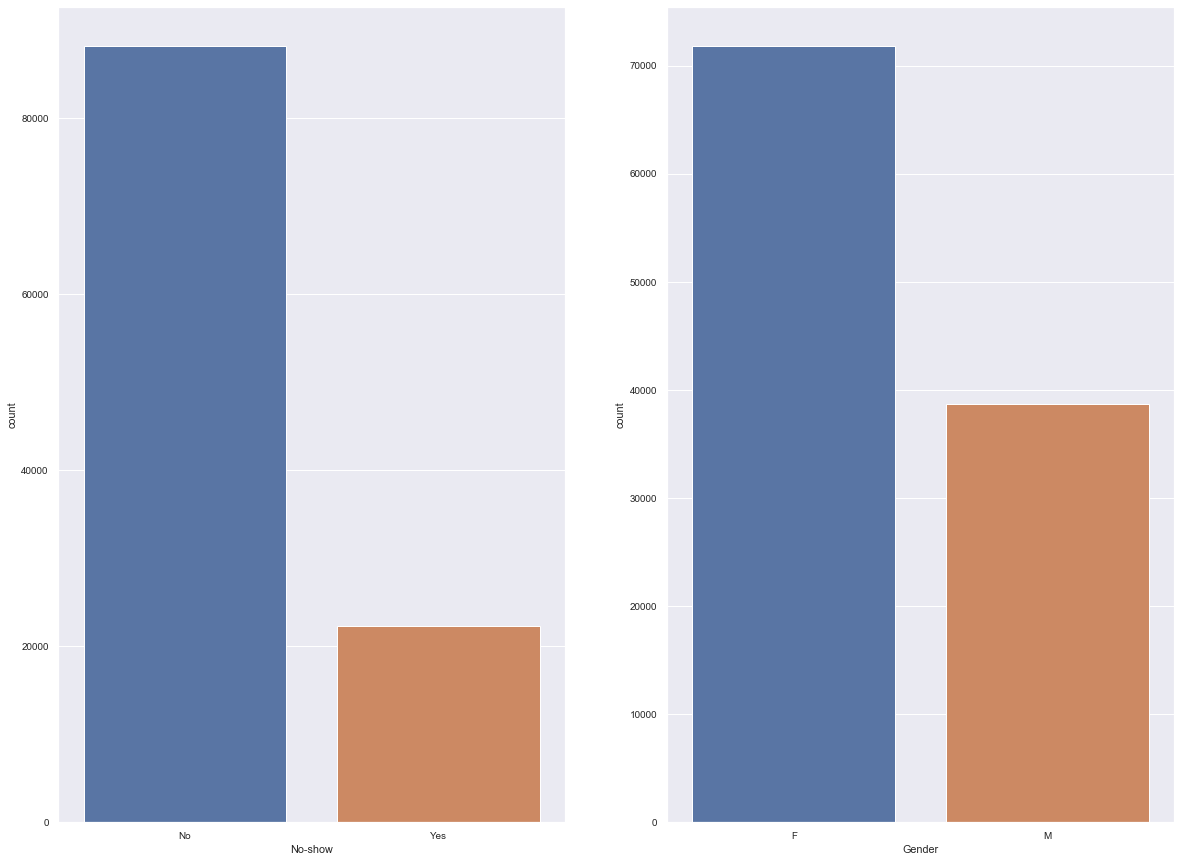

In [49]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(x="No-show" , data=df, ax=axs[0])
sns.countplot(x="Gender" , data=df, ax=axs[1])

- **As we see that th patients count who Commitment to their appointment are higher that who don’t show, that there are about 90,000 patient are commitment.**
- **And the number of females are higher tha males and that is obviously Because females are always care about their health and beauty more than males..**

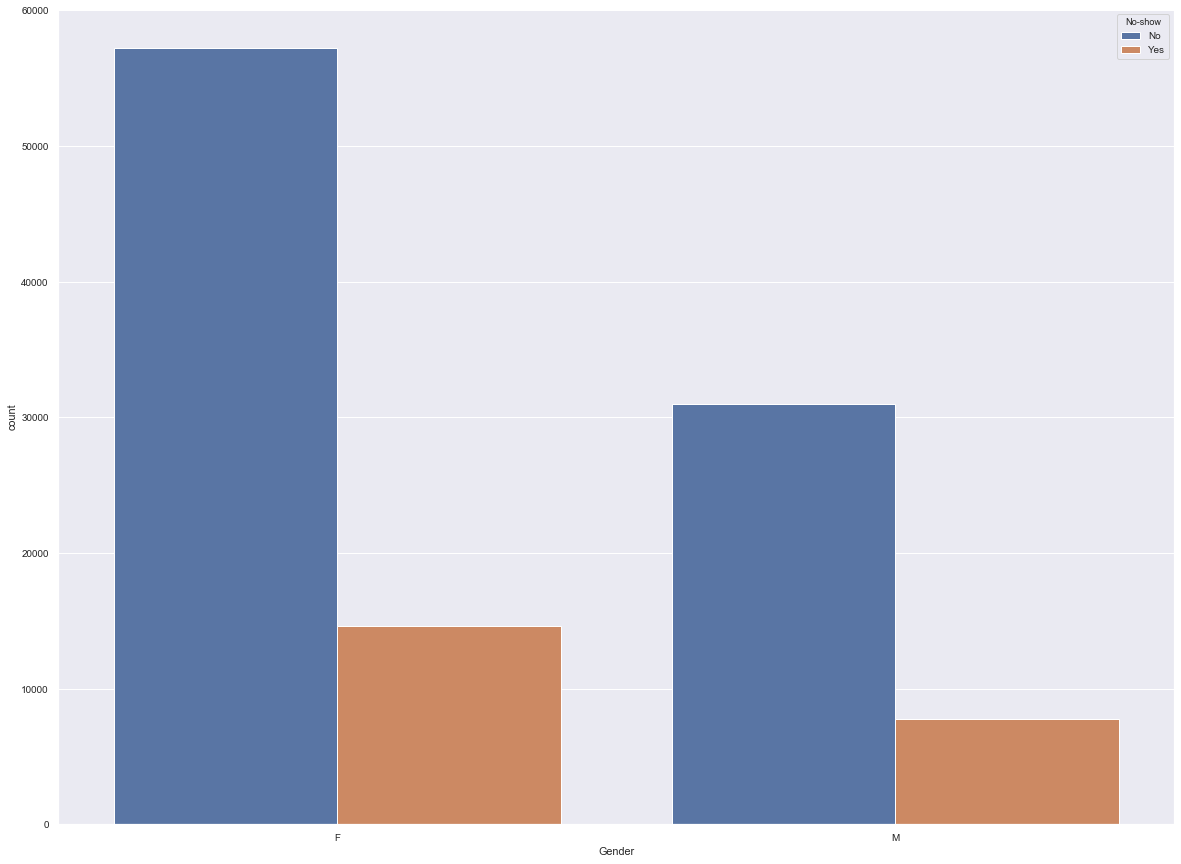

In [50]:
Count_plot(x="Gender",hue='No-show')

**Again the females are more commitment than males for their appointment to doctors for the previous reason.**

--------

### Research Question 2  (Is Age difference affect `Show / No-Show`?)

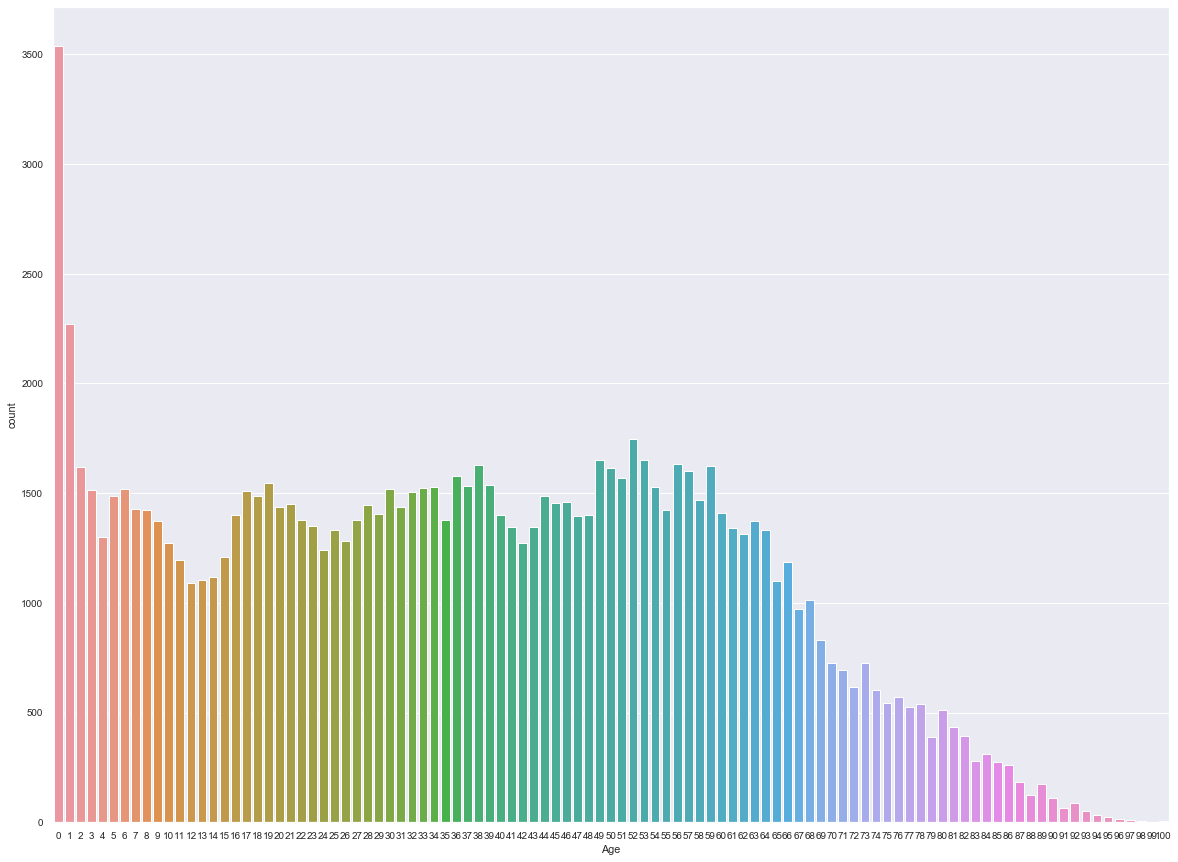

In [51]:
Count_plot(x="Age")

- **As we see than the highest patient to Registerated to doctors are below 1 years old..**
- **After 50 years old the count decrease with the age increase..**

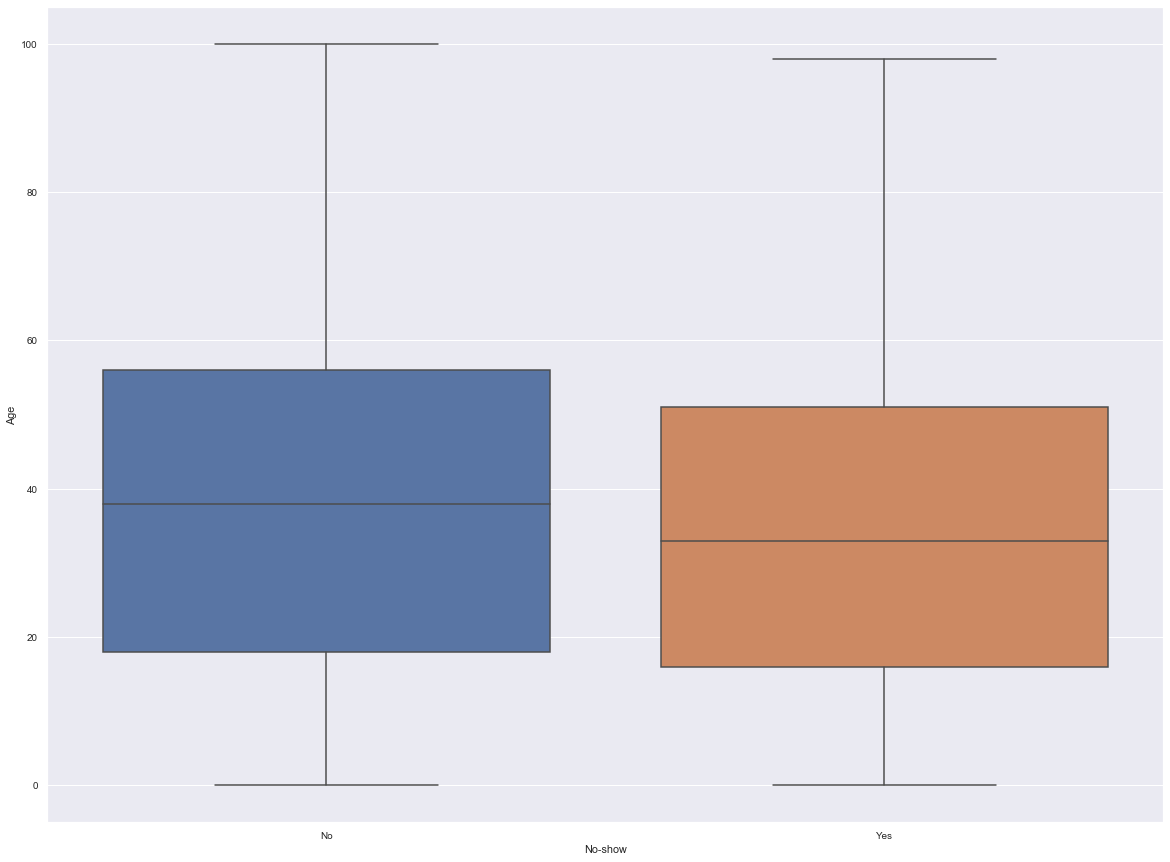

In [52]:
sns.boxplot(x="No-show", y="Age", data=df)

- **We see that the most Patients, their age are between 18 and 58 and who is above 50 are more commitment to their doctors appointment.**


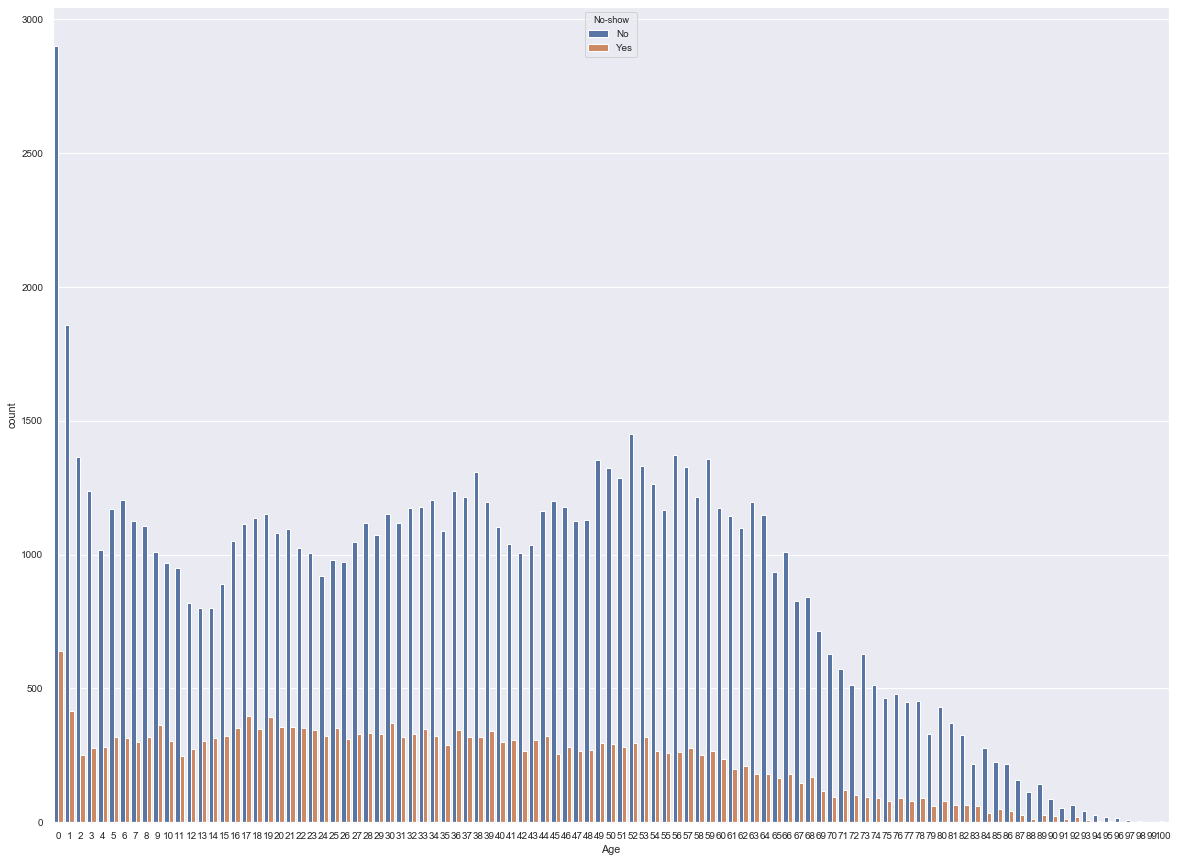

In [53]:
Count_plot(x="Age",hue='No-show')

**This figure shows the same as before graphs:**
- **That most patients are below age 1 and they are Commitment to Doctors appointment ecaure for sure their cirtical age whcih required more visits to doctors.**

--------

### Research Question 3 (Is Age difference along with Gender difference affect `Show / No-Show`?)

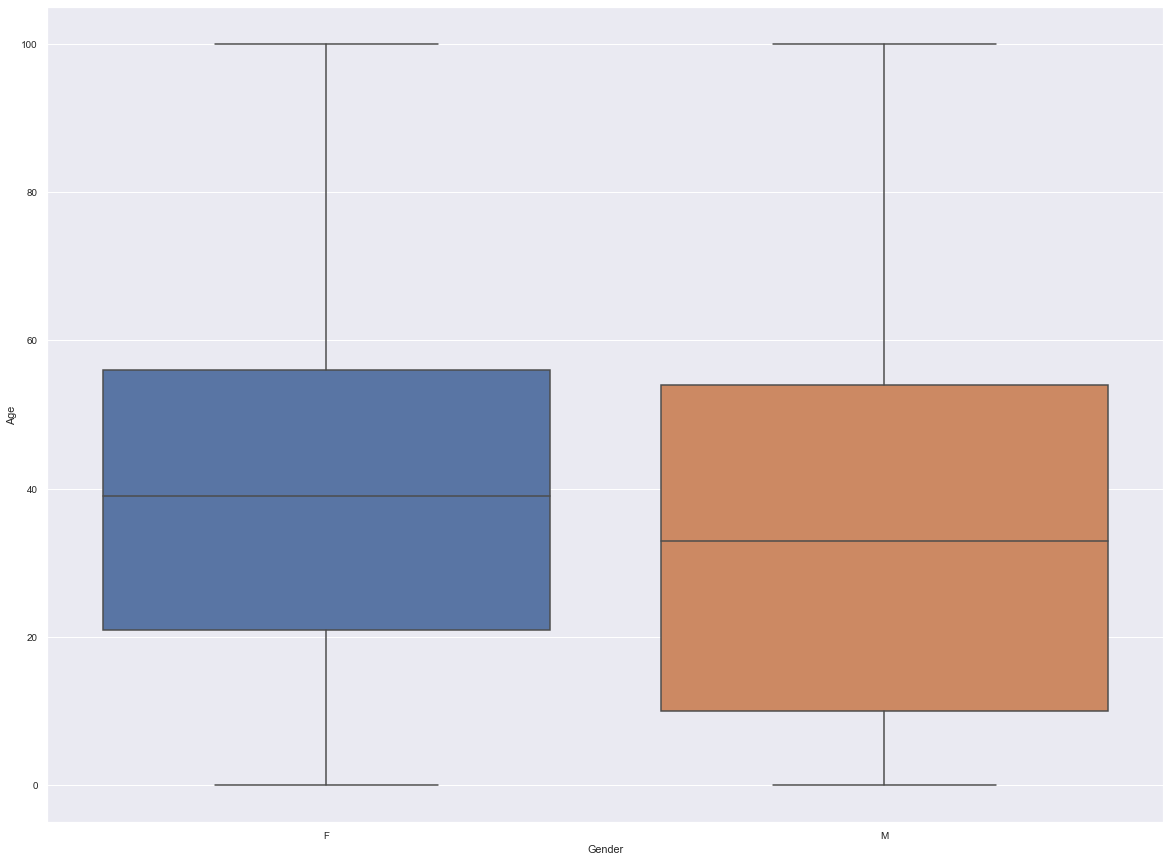

In [54]:
sns.boxplot(x="Gender", y="Age", data=df)

- **As we see, the most male patients age are between 10 and 54 and it is a wide range..**
- **But for females, their age between 22 and 58..**

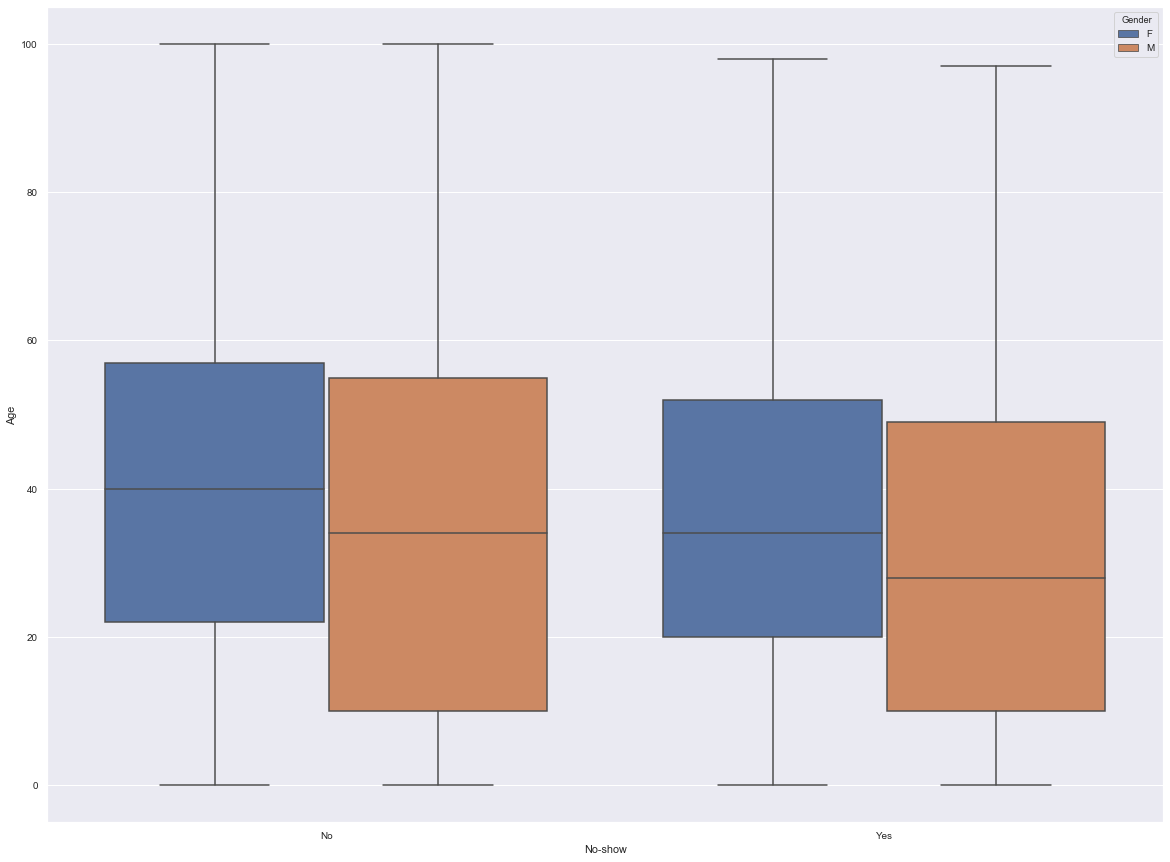

In [55]:
sns.boxplot(x="No-show", y="Age",hue='Gender', data=df)

- **The above graph prove the previous one that the range of males and females who show and No-show are the same as previous..**

--------

### Research Question 4 (which day the appointments are Maximum and the patient `Show`?)

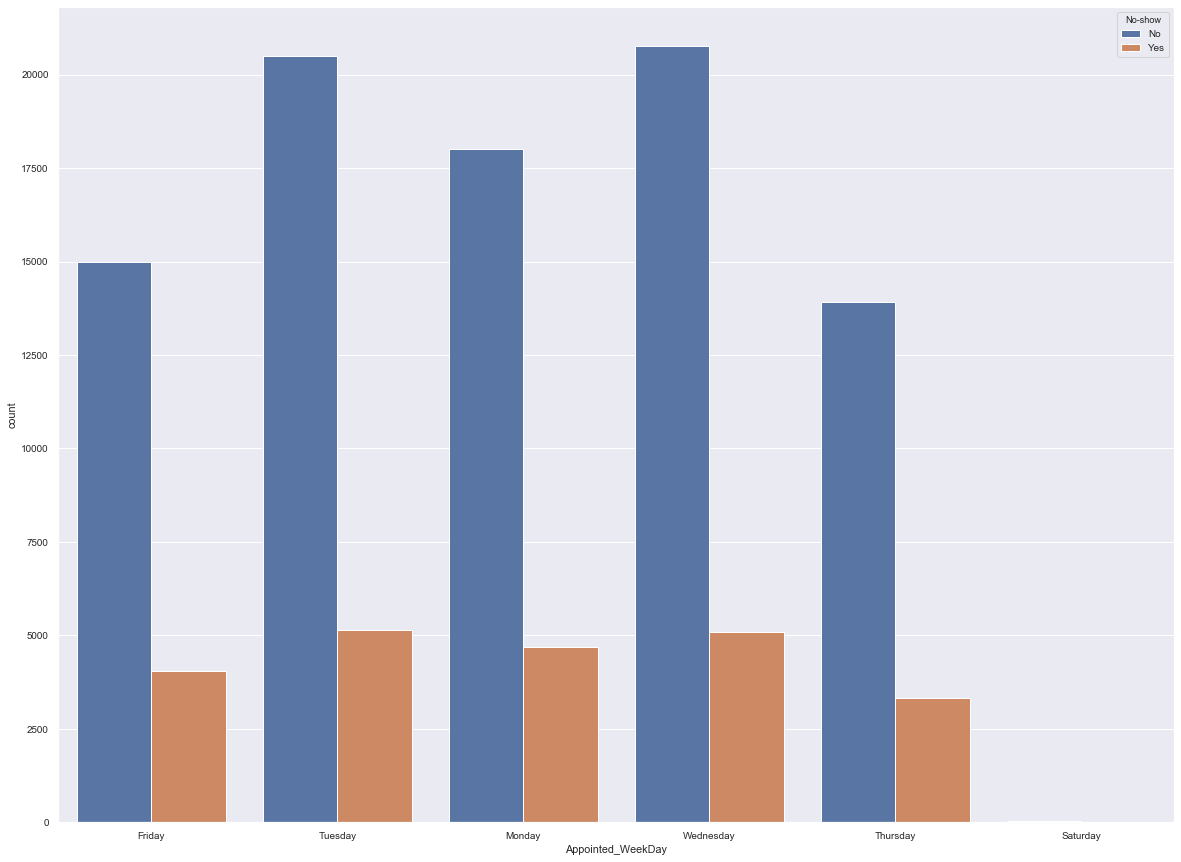

In [56]:
Count_plot(x="Appointed_WeekDay",hue='No-show')

- **As we see, the days that have more appointment are (Monday, Tuesday, Wednesday) and it seems that Saturday has the lowest number of patients appointments which maybe because its doctors holiday.**

--------

### Research Question 5 (Is There any effect of  Waiting_Time on the patient `Show`?)

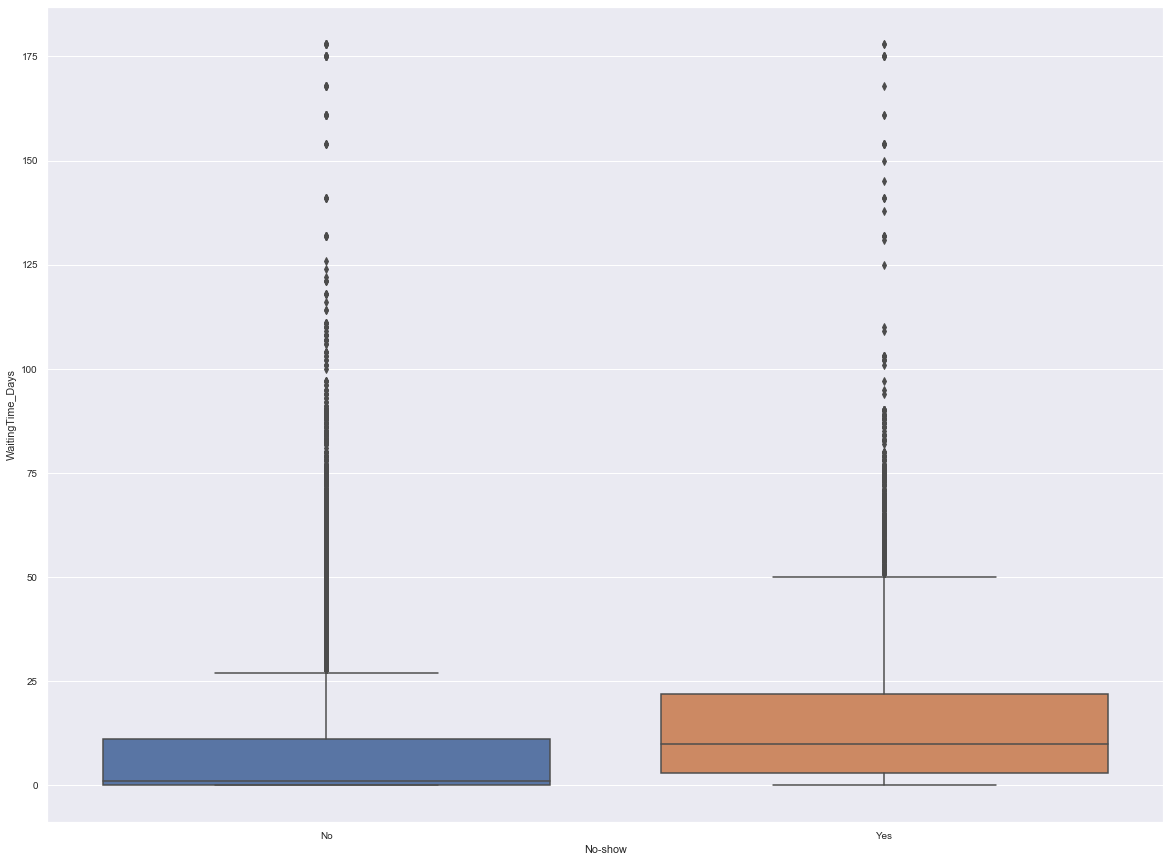

In [57]:
sns.boxplot(x="No-show", y="WaitingTime_Days", data=df)

- **We see that when the `WaitingTime_Days` increase, the probabilty that patient doesn't show increases..**

--------

### Research Question 6 (Which neighbourhood regions are actually have higher appointments and how that affect `Show / No-Show`?)

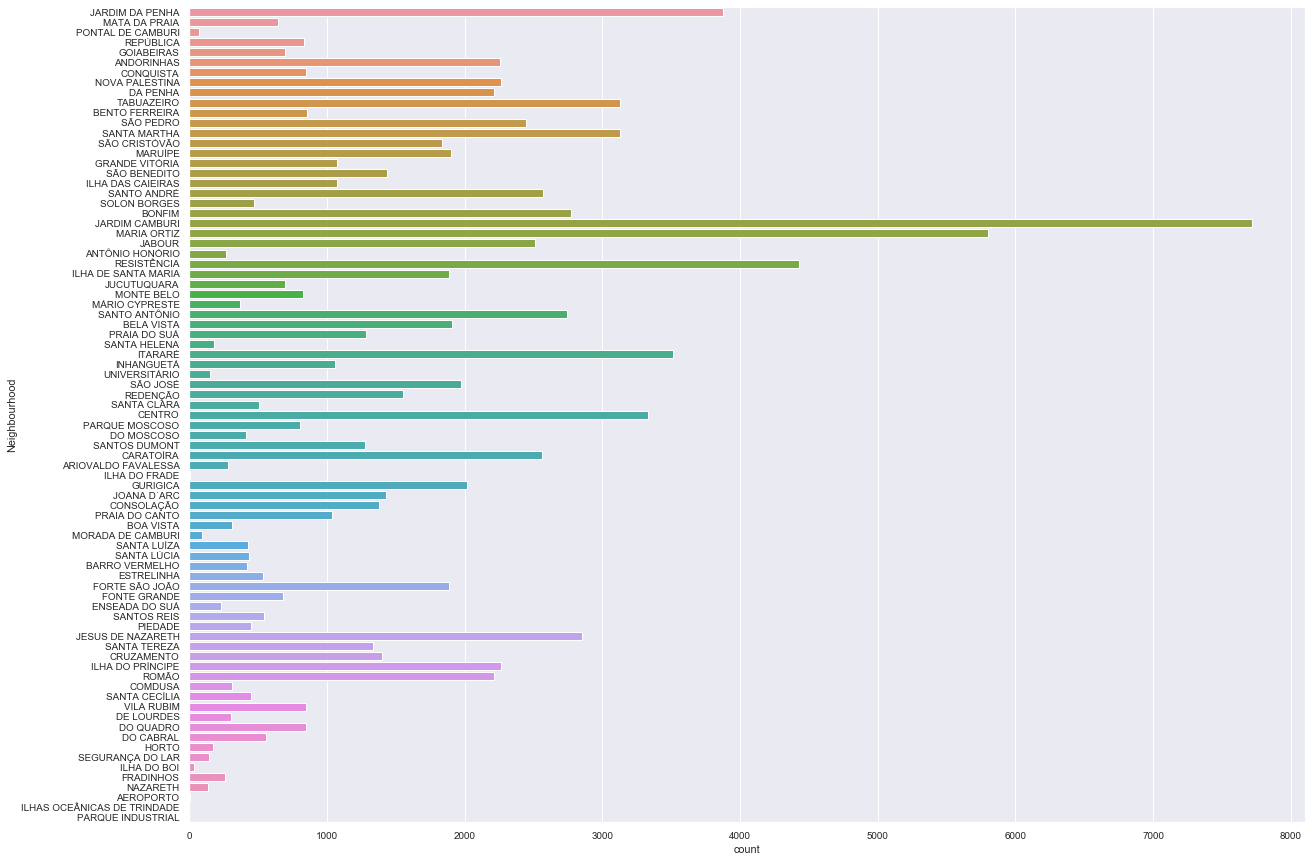

In [58]:
Count_plot(y="Neighbourhood")

- **This shows the number of Patients from Each Neighbourhood and it is a bad visulaization because we couldn’t locate the highest towns acuraty to see the relations we want**

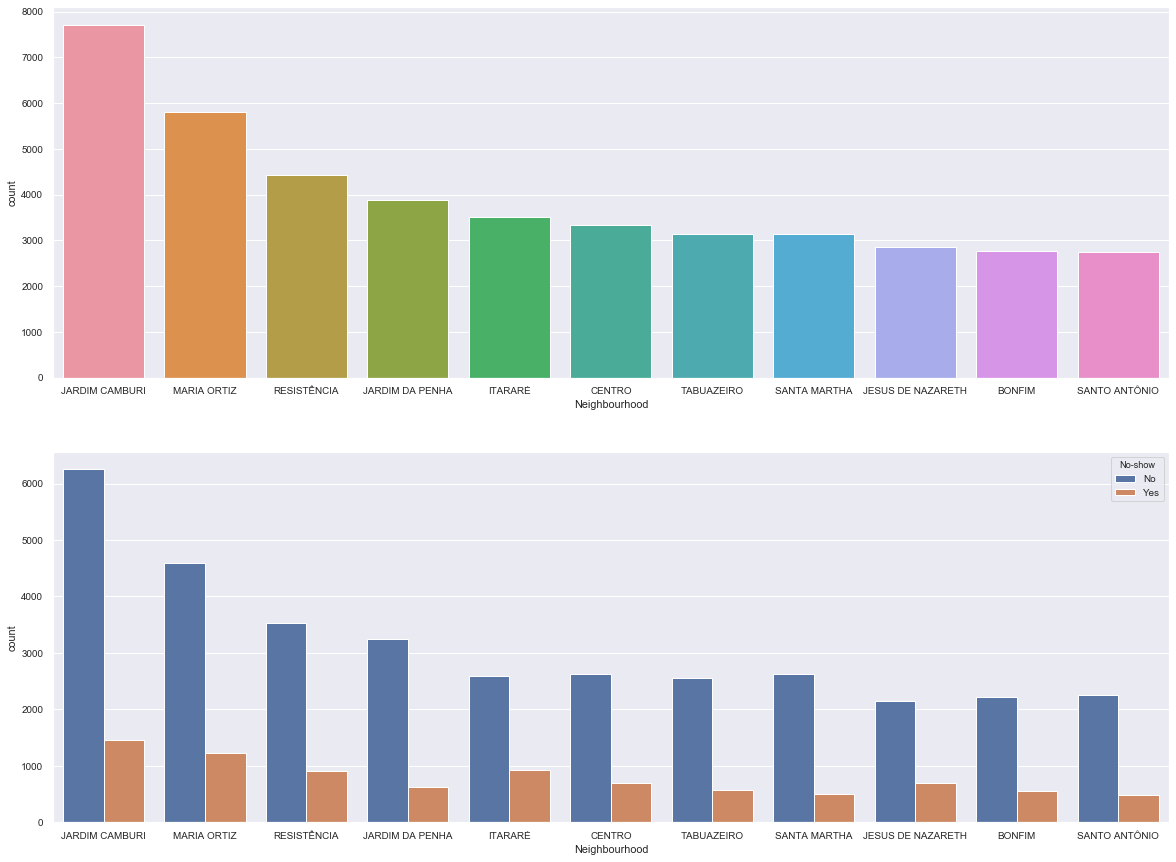

In [59]:
fig, axs = plt.subplots(nrows=2)

sns.countplot(x="Neighbourhood", data=df, order=df.Neighbourhood.value_counts().iloc[:11].index, ax=axs[0])
sns.countplot(x="Neighbourhood",hue='No-show', data=df, order=df.Neighbourhood.value_counts().iloc[:11].index,
              ax=axs[1])

- **The first plot, shows the top ten Neighbourhood in Patients.**

- **The second plot, shows that the No-show with the top ten Neighbourhood and we figured out that it isn’t necessary that high towns with patients should be all committed to their doctors appointment.**

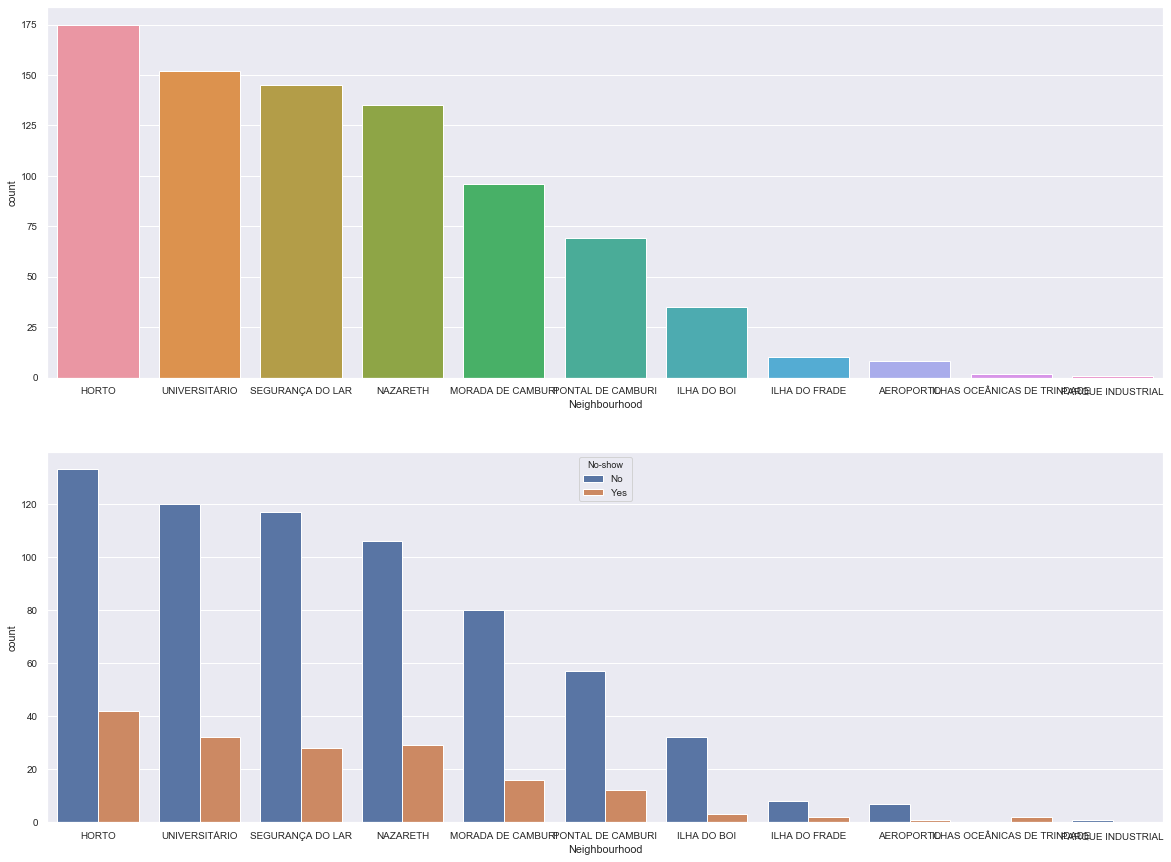

In [60]:
fig, axs = plt.subplots(nrows=2)

sns.countplot(x="Neighbourhood", data=df, order=df.Neighbourhood.value_counts().iloc[-11:].index, ax=axs[0])
sns.countplot(x="Neighbourhood",hue='No-show', data=df, order=df.Neighbourhood.value_counts().iloc[-11:].index,
              ax=axs[1])

- **The first plot, shows the lowest ten Neighbourhood in Patients.**

- **The second plot, shows that the No-show with the lowest ten Neighbourhood in Patients.**
- **We figured out that it isn’t necessary that high towns with patients should be all committed to their doctors appointment But the industrial Towns are committed to their appointment.**

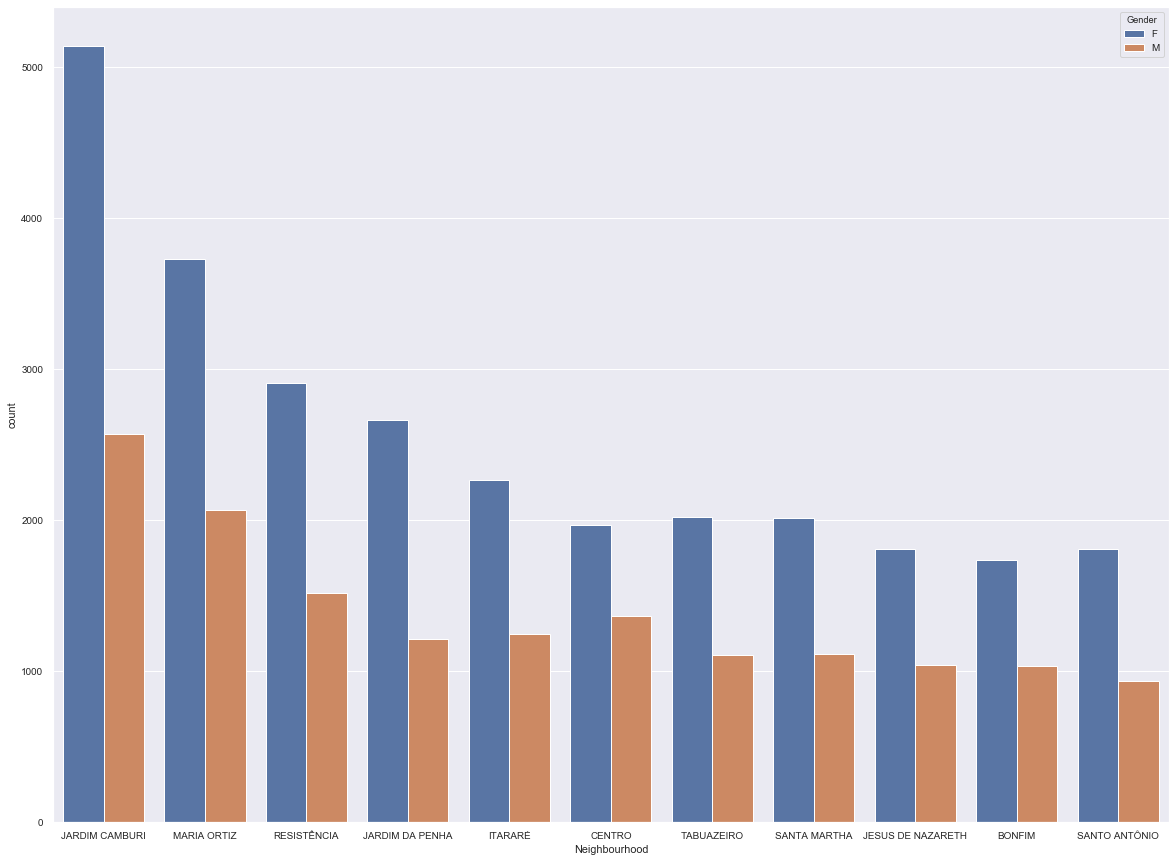

In [61]:
sns.countplot(x="Neighbourhood",hue='Gender', data=df, order=df.Neighbourhood.value_counts().iloc[:11].index)

- **This figure prove again that Females percent in Neighbourhood are higher than Males.**

--------

### Research Question 7 (Is the Scholarship program helping patients to usually see doctors?)

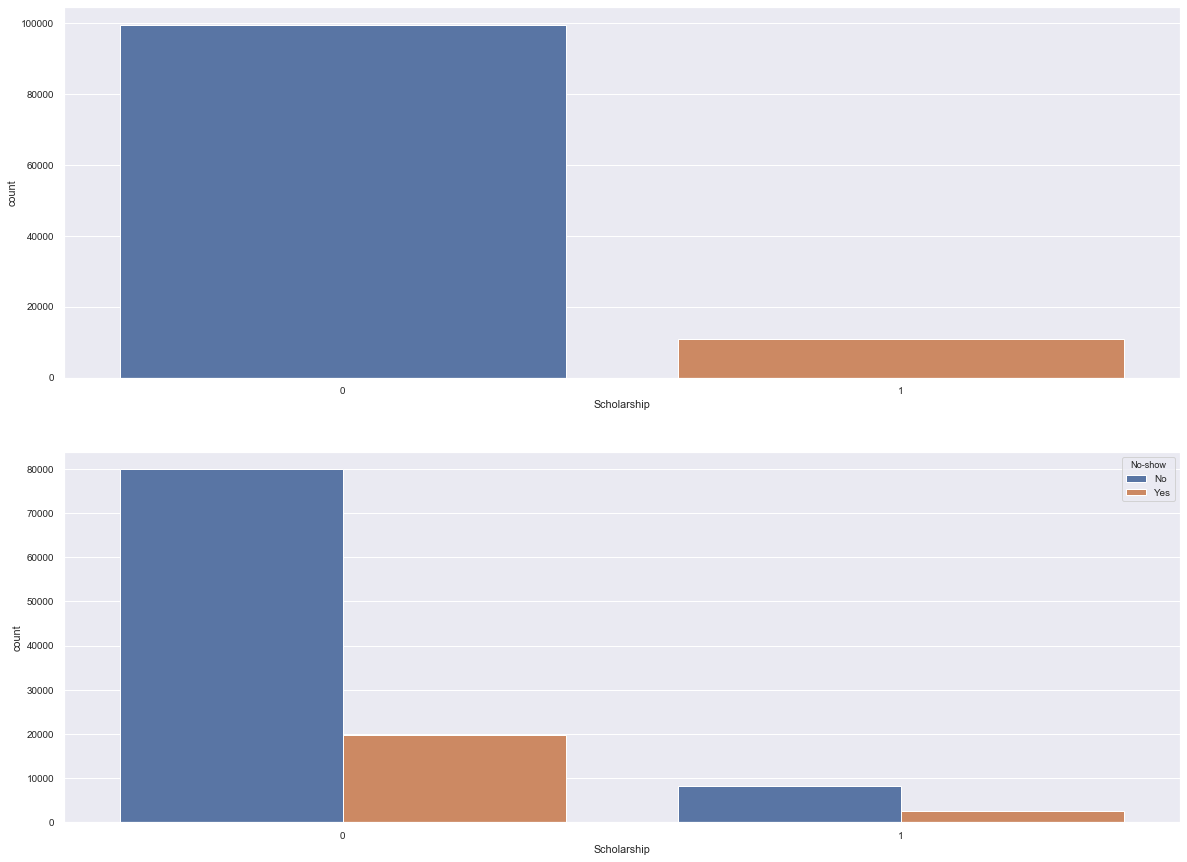

In [62]:
fig, axs = plt.subplots(nrows=2)

sns.countplot(x="Scholarship", data=df, ax=axs[0])
sns.countplot(x="Scholarship",hue='No-show', data=df, ax=axs[1])


- **The first Plot Shows, the Patients with Scholarship program with Government is very low in comparison with Non-Scholarship Patients and this indicats that the governmnet should increase the awareness of people to apply for this program.**

- **The second plot Shows that the percent of patients who No-show are higher with whom had a scholarship!.**

--------

### Research Question 8 (Is there medical condition that make the patient(Male/Female) to go to for the doctor ?)

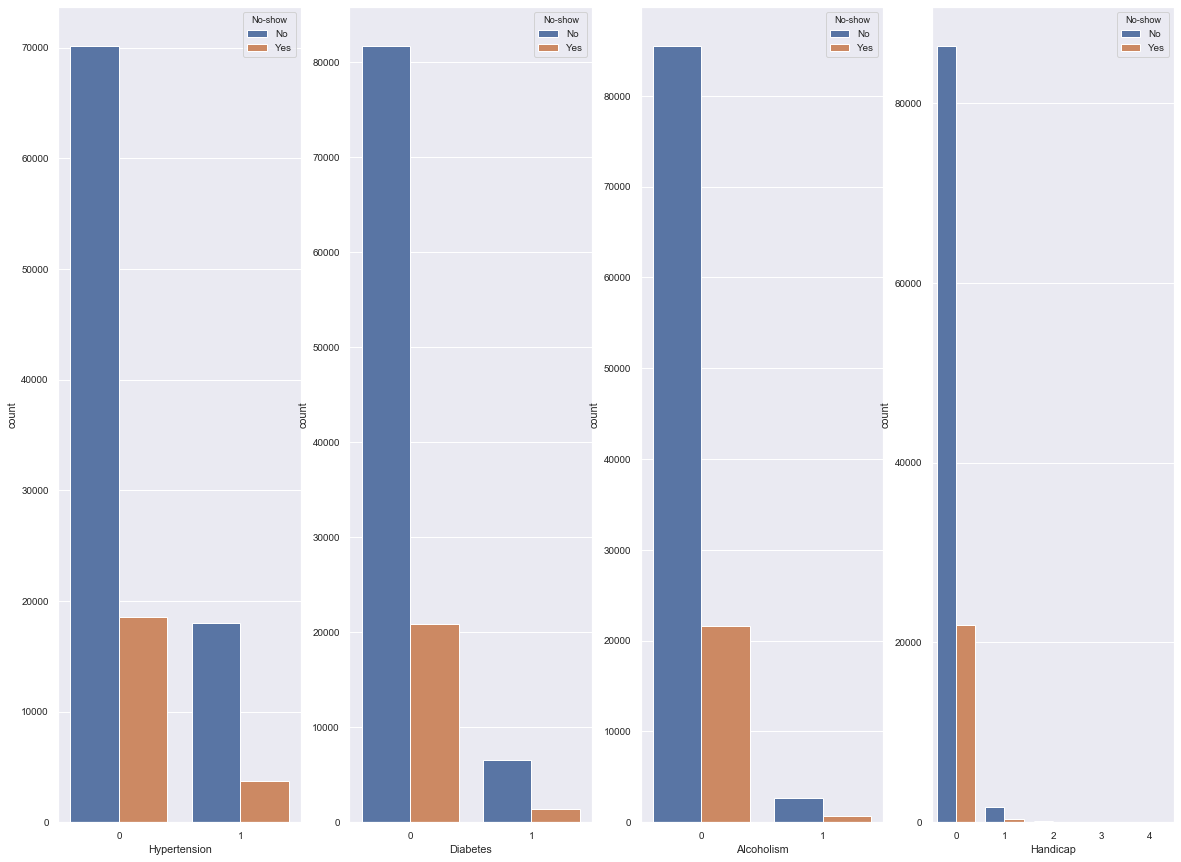

In [63]:
fig, axs = plt.subplots(ncols=4)
sns.countplot(x='Hypertension',hue='No-show',data=df, ax=axs[0])
sns.countplot(x='Diabetes',hue='No-show',data=df, ax=axs[1])
sns.countplot(x='Alcoholism',hue='No-show',data=df, ax=axs[2])
sns.countplot(x='Handicap',hue='No-show',data=df, ax=axs[3])

- **From these plot we can see that most of patients Didn’t have any critical medical condition.**
- **Also who have medical condition, they seem higher in show at doctors and committed to the appointment.**

--------

### Research Question 9 (Are the doctors SMS-reminders affect `Show / No-Show`?)

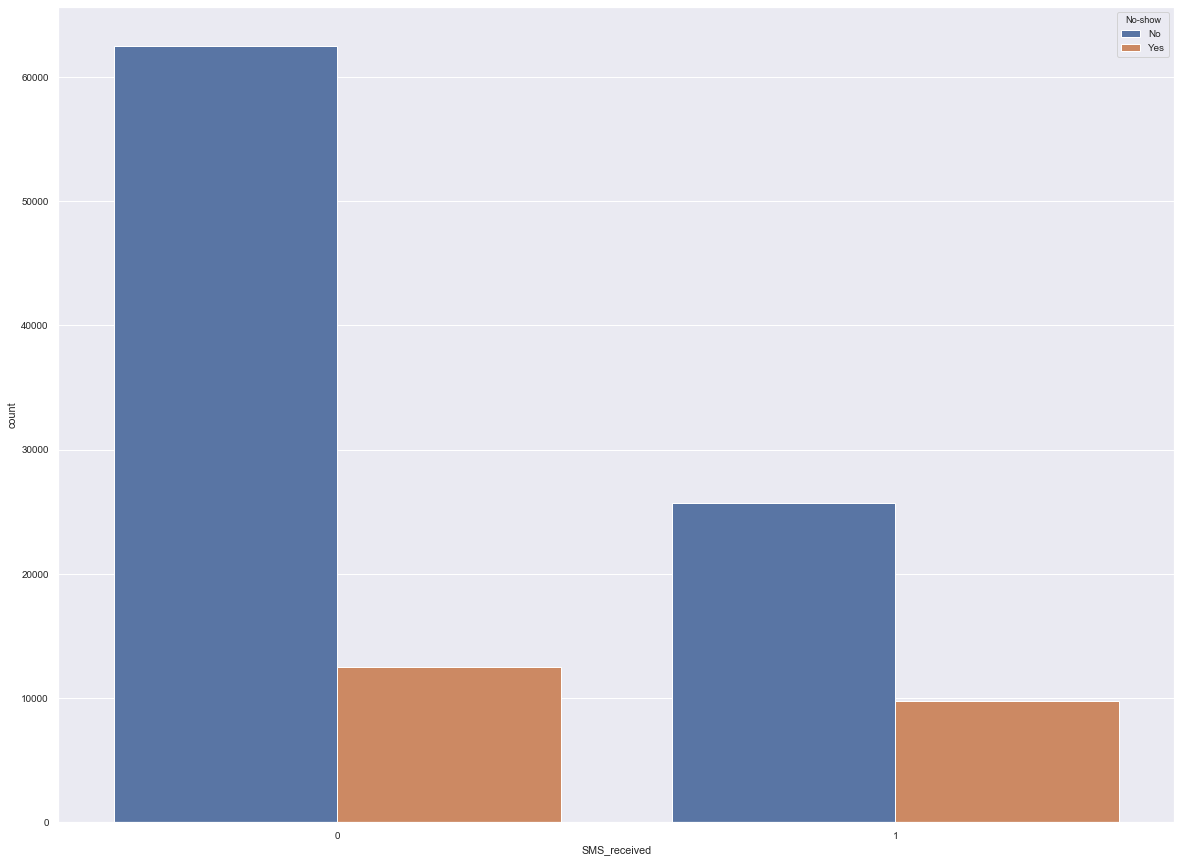

In [64]:
Count_plot(x='SMS_received',hue='No-show')

- **This plot is very important and shows that the patients who receive SMS reminder to their appointment, don’t show more than who didn’t receive SMS. Though we should analyis this which may be the sms reminder are annoying.**

--------------
-------------

## Limitations


1. We don't have the data of all 2016 year ro make a comparsion about the most month with high Appointments.

2. We need more data about neighborhood population to make a comparsion about the number of patient to the total number of each town.

3. We need more data about SMS remibder process to identify the reasons of why the patients who recived SMS don't show.

4. Also doctor specialization would have helped us for etter visualiztion about with doctors the patients don't show.


<a id='conclusions'></a>
## Conclusions

1. There are a huge number of Femeals who go to doctors more than males and for sure because they are take caring about their health more.

2. The most patients are below age 1 and they are Commitment to Doctors appointment because of their cirtical age whcih required more visits to doctors and Patients Who’s age above 50 are also commitment to their doctors appointment.

3. The most male patients age are between 10 and 54 and it is a wide range, But the females age between 22 and 58.

4. The days that have more appointment are (Monday, Tuesday, Wednesday) and it seems that Saturday has the lowest number of patients appointments which maybe because its doctors holiday.

5. When the `WaitingTime_Days` increase, the probabilty that patient doesn't show increases.

6. It isn’t necessary that high towns with patients should be all committed to their doctors appointment,But the industrial Towns are all committed to their appointment because the Pollutions of factors and etc.

7. The percent of patients who No-show are higher with whom had a scholarship.

8. We can see that most of patients didn’t have any critical medical condition and who have medical condition, they seem higher in show at doctors and committed to the appointment.

9. The patients who receive SMS reminder to their appointment, don’t show more than who didn’t receive SMS. Though we should analyis this which may be the SMS reminder are annoying.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset(Medical_Appointment_NoShows).ipynb'])

0